In [30]:
# https://www.tensorflow.org/tutorials/images/segmentation

from fastai.vision.all import *
# %% [markdown]
# images
path = Path(".").absolute().parent / "data/train"
fnames = get_image_files(path/"images")
print('example file name:', fnames[0])
print('of', len(fnames), 'training examples')

example file name: D:\Dev\hedgehog_finder\data\train\images\1\1.png
of 301 training examples


## Define DataLoaders

In [2]:
from hedgiefinder.dataloading import get_msk

codes = ['Background', 'Hog', 'Outline']

hogvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_msk,
                   batch_tfms=aug_transforms(do_flip=False, max_rotate=2),
                   item_tfms=Resize(224, method='squish'))

dls = hogvid.dataloaders(path / "images", path=path, bs=10)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


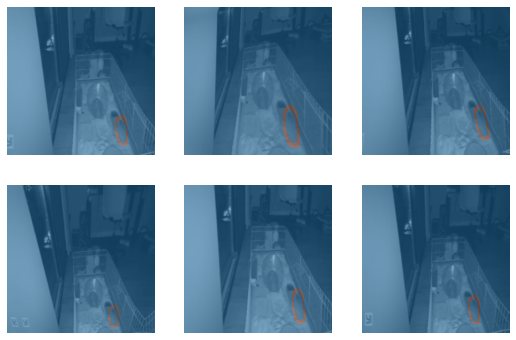

In [3]:
dls.show_batch(max_n=6, unique=True)

In [4]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([10, 3, 224, 224]), torch.Size([10, 224, 224]))

epoch,train_loss,valid_loss,foreground_acc,time
0,0.112732,0.045459,0.000000,00:32


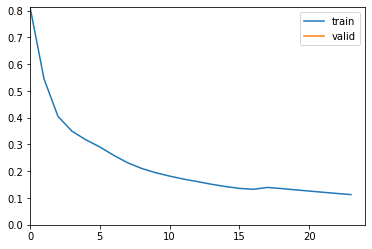

epoch,train_loss,valid_loss,foreground_acc,time
0,0.036680,0.031096,0.000000,00:35
1,0.029219,0.047957,0.000000,00:33
2,0.024446,0.034511,0.062471,00:33
3,0.020682,0.053896,0.038804,00:31
4,0.017387,0.036379,0.153541,00:33
5,0.014903,0.057682,0.061871,00:33
6,0.013543,0.053787,0.115579,00:31
7,0.012048,0.025729,0.316270,00:33
8,0.010777,0.033955,0.276913,00:33
9,0.009830,0.048774,0.217008,00:31


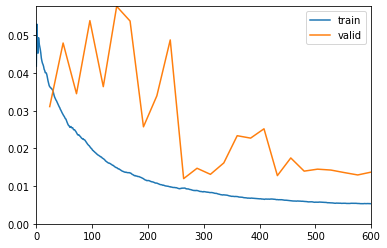

In [5]:
learn = unet_learner(dls, resnet34, cbs=ShowGraphCallback(), metrics=[foreground_acc])
learn.fine_tune(25)

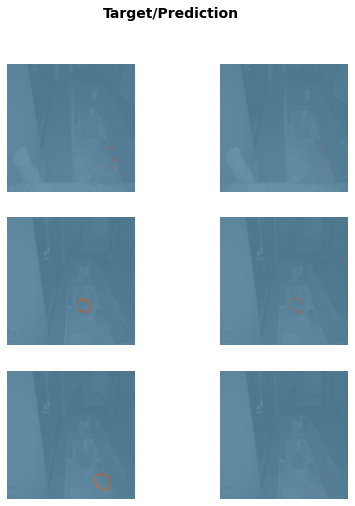

In [12]:
learn.show_results(max_n=3, figsize=(7,8))

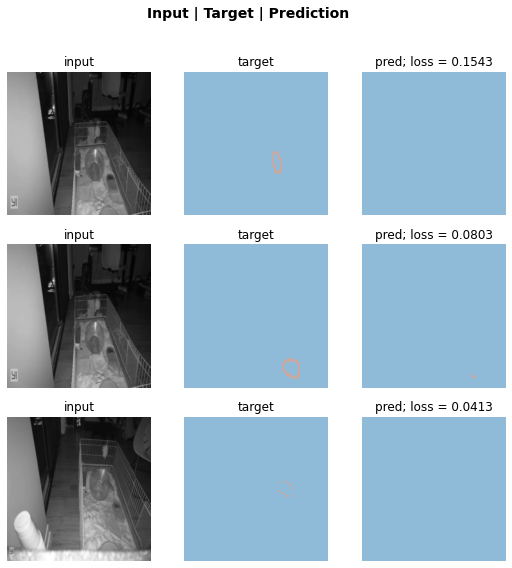

In [11]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

In [27]:
from datetime import datetime
model_path = path.parent.parent / 'hedgiefinder' / 'models'
model_name = model_path / datetime.now().strftime("%Y%m%d_%H%M.pkl")

model_dir = model_name.parent
model_dir.mkdir(exist_ok=True)

learn.export(model_name)
print(model_name)

D:\Dev\hedgehog_finder\hedgiefinder\models\20210304_2232.pkl


In [28]:
import matplotlib.pyplot as plt

from hedgiefinder import HedgieFinder
from hedgiefinder.inference import alpha_mask

Loading Video...


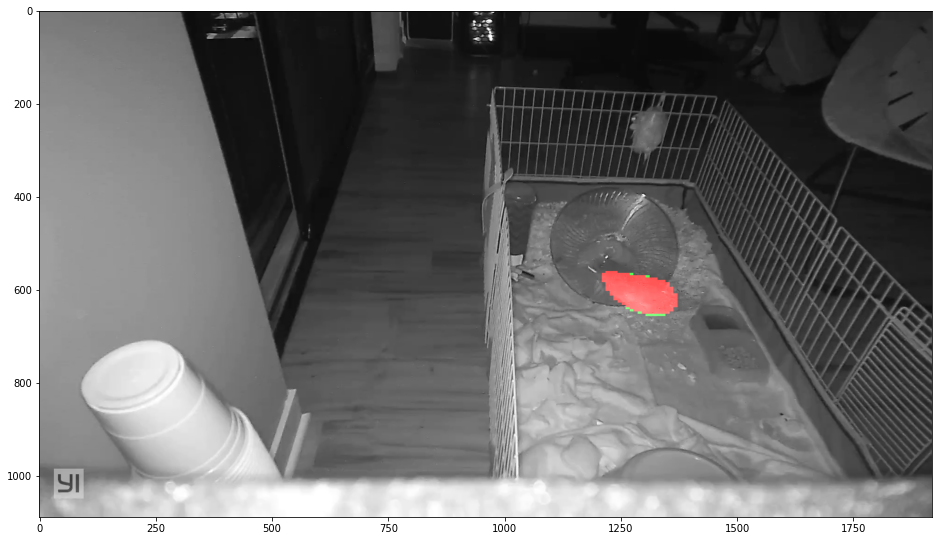

In [29]:
fname = fnames[15]

hf = HedgieFinder(test_im).predict([fname])
overlay = alpha_mask(hf.originals, hf.predictions)

f, axs = plt.subplots(1,1, figsize=(16,16))
axs.imshow(overlay[0])
plt.show()